In [1]:
from soil.agents import FSM, state, default_state
from soil import Environment
from random import random, shuffle, sample
from itertools import islice
import logging
from enum import Enum
from random import randint
from soil import simulation
from soil import *
import soil
import networkx as nx
import matplotlib.pyplot as plt
import logging
import random
import numpy
logging.basicConfig()


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
class Genders(Enum):
    male = 'male'
    female = 'female'

class Venues(Enum):
    pub = 'pub'
    disco = 'disco'
    street = 'street'


class CityPubs(Environment):

    """
    The environment is key in a simulation. It contains the network topology,
    a reference to network and environment agents, as well as the environment
    params, which are used as shared state between agents.
    The environment parameters and the state of every agent can be accessed
    both by using the environment as a dictionary or with the environment's 
    :meth:`soil.environment.Environment.get` method.
    'name': 'The awesome pub #{}'.format(i),
                'open': True,
                'capacity': pub_capacity ,
                'occupancy': 0,
                'price':randint(4, 6),
                'type': Venues.pub.value,
    """

    '''Environment with Pubs'''
    level = logging.INFO

    # ----------------------------------INICIALIZADOR----------------------------------------------------------------------------
    """def __init__(self, *args, number_of_pubs=3, number_of_discos=3, number_of_street=3, pub_capacity=10,
                 disco_capacity = 20, street_capacity = 30, **kwargs):
                    super(CityPubs, self).__init__(*args, **kwargs)  #Para la clase superior. Constructor super.
                    pubs = {}
                    for i in range(number_of_pubs):
                        newpub = {
                            'name': 'The awesome pub #{}'.format(i),
                            'open': True,
                            'capacity': pub_capacity ,
                            'occupancy': 0,
                            'price':randint(4, 6),
                            'type': Venues.pub.value,
                        }
                        pubs[newpub['name']] = newpub
                    for i in range(number_of_discos):
                        newpub = {
                            'name': 'The awesome disco #{}'.format(i),
                            'open': True,
                            'capacity': disco_capacity ,
                            'occupancy': 0,
                            'price':randint(7, 9),
                            'type': Venues.disco.value,
                        }
                        pubs[newpub['name']] = newpub
                    for i in range(number_of_street):
                        newpub = {
                            'name': 'The awesome street #{}'.format(i),
                            'open': True,
                            'capacity': pub_capacity ,
                            'occupancy': 0,
                            'price':randint(2,4),
                            'type': Venues.street.value,
                        }
                        pubs[newpub['name']] = newpub
            
                        
                    self['pubs'] = pubs"""


    def __init__(self, *args, pubs=None, **kwargs):
        super(CityPubs, self).__init__(*args, **kwargs)  #Para la clase superior. Constructor super.

            
        self['pubs'] = pubs or {}

        """ >>> tel = {'jack': 4098, 'sape': 4139}
            >>> tel['guido'] = 4127    
            >>> tel
            {'sape': 4139, 'guido': 4127, 'jack': 4098}"""

        #Hacemos un bucle y llenamos la variable pubs con los bares que va a haber: queda así:
            #{'The awesome pub #2': {'name': 'The awesome pub #2', 'open': True, 'capacity': 10, 'occupancy': 0}, 
            # 'The awesome pub #1': {'name': 'The awesome pub #1', 'open': True, 'capacity': 10, 'occupancy': 0}, 
            # 'The awesome pub #0': {'name': 'The awesome pub #0', 'open': True, 'capacity': 10, 'occupancy': 0}}


    #----------------------------------------MÉTODOS-------------------------------------------------------------------------------------
   

    def return_occupancy (self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['occupancy']

    def return_price(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['price']

    def return_name(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['name']

    def return_type(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['type']




    def enter(self, pub_name, *nodes):

        '''Agents will try to enter. The pub checks if it is possible'''
        #A este método se le pasa el id del pub al que quieren entrar, y el grupo de amigos.
        #Hace comprobaciones con la capacidad y viendo si está abierto. Devuelve True si se puede entrar.

        try:
            pub = self['pubs'][pub_name]
        except KeyError:
            raise ValueError('Pub {} is not available'.format(pub_name))

        for node in nodes:
            if not pub['open'] or (pub['capacity'] < (len(nodes) + pub['occupancy'])) or node['money']< pub['entry']:

                return False

        pub['occupancy'] += len(nodes)
        for node in nodes:
            node['pub'] = pub_name
            node['money'] = node['money'] - pub['entry']
        return True


    #Devuelve una lista de pubs en los que se puede entrar. Lo hace con yield: se genera un objeto en vez de 
    # una lista. Cuando se llama al método no se genera la lista, se genera un objeto. SOlo cuando intentemos recorrerlo
    # se generará una lista que además solo puede recorrerse una vez --> https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do
    """def available_pubs(self):
                    
                    for pub in self['pubs'].values():
                        if pub['open'] and (pub['occupancy'] < pub['capacity']):
                            yield pub['name']"""

    def available_pubs_total(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']):
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_pubs(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "pub":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_discos(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "disco":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_street(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "street":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    #Un grupo se va de un pub. La sintaxis "del" es como decir que te vacíe esa variable
    """def exit(self, pub_id, *node_ids):
                    '''Agents will notify the pub they want to leave'''
                    try:
                        pub = self['pubs'][pub_id]
                    except KeyError:
                        raise ValueError('Pub {} is not available'.format(pub_id))
                    for node_id in node_ids:
                        node = self.get_agent(node_id)
                        if pub_id == node['pub']:
                            del node['pub']
                            pub['occupancy'] -= 1
            
                def exit(self, pub_id, *nodes):
                    '''Agents will notify the pub they want to leave'''
                    try:
                        pub = self['pubs'][pub_id]
                    except KeyError:
                        raise ValueError('Pub {} is not available'.format(pub_id))
                    for node in nodes:
                     
                        if pub_id == node['pub']:
                            del node['pub']
                            pub['occupancy'] -= 1
            """
    def exit(self, pub_name, *nodes):

        try:
            pub = self['pubs'][pub_name]
        except KeyError:
            raise ValueError('Pub {} is not available'.format(pub_name))
        
        pub['occupancy'] -= len(nodes)
        
        

In [3]:
class Patron(FSM):
    '''Agent that looks for friends to drink with. It will do three things:
        1) Look for other patrons to drink with
        2) Look for a bar where the agent and other agents in the same group can get in.
        3) While in the bar, patrons only drink, until they get drunk and taken home.
    '''
    level = logging.INFO

    defaults = {
        'pub': None,
        'drunk': False,
        'pints': 0,
        'max_pints': 5,
        'in_a_group':False,
        'gender': Genders.male.value,
        'money':20,
        'is_leader': False,
        'group_size':0,
        'total_changes':0,
        'num_of_changes':0,
        'age': 15,
        ##'interval'
    }

    


    @default_state
    @state
    def looking_for_friends(self):
        '''Look for friends to drink with'''
        #Dependiendo de la edad podemos hacerles algunas asignaciones de parámetros de esta manera, ya que en el otro
        #lado no se le puede meter código
        if self['age'] == 15:
            self['money'] = 20 #EN un futuro aquí se pone self['money'] = numpy.random.normal(20) o algo así imaginemos
        elif self['age'] == 20:
            self['money'] = 25
        else:
            self['money']=35

        if(self['in_a_group'] == False):
            self.info('I am looking for friends')
            self['is_leader'] = True
            self['num_of_changes'] = numpy.random.normal(5.9,2)
            available_friends = list(self.get_agents(drunk=False,
                                                     pub=None,
                                                     in_a_group=False,
                                                     age=self['age']))
                                                     
            if not available_friends or len(available_friends)==1:
                self.info('Life sucks and I\'m alone!')
                return self.at_home
            befriended = self.try_friends(available_friends)
            if befriended:
                
                return self.looking_for_pub#, self.env.timeout(3)
        else:
            self.info('{} has a group already' .format(self.id))
            return self.looking_for_pub

    @state
    def looking_for_pub(self):
        '''Look for a pub that accepts me and my friends'''
        if self['pub'] != None:
            return self.sober_in_pub
        self.debug('I am looking for a pub')
        group = list(self.get_neighboring_agents())

        r = random()


        # ESTO DEPENDE DE LOS ITINERARIOS
        # TENDRÁ QUE EMPEZAR CADA UNO EN UN SITIO DEPENDIENDO DE LA EDAD Y LUEGO SIGUEN INTINERARIOS FIJOS
        # CON UNA CIERTA PROBABILIDAD

        #Preguntar como se ponen estas probabilidades en base a los estudios

        if(self['age'] == 15):

            if (0.4>r):
                available_pubs = self.env.available_pubs()

            if (0.75>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()

        elif(self['age'] == 20):

            if (0.5>r):
                available_pubs = self.env.available_pubs()

            if (0.8>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()

        else:

            if (0.6>r):
                available_pubs = self.env.available_pubs()

            if (0.9>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()



        for pub in available_pubs:


            self.debug('We\'re trying to get into {}: total: {}'.format(pub, len(group)))
            if self.env.enter(pub, self, *group):
                self.info('We\'re all {} getting in {}!'.format(len(group)+1, pub))
                capacity = self.env.return_occupancy(pub)
                self.info('{} now has {} people inside'.format(pub,capacity))
                return self.sober_in_pub
            else:
                self.info("We can\'t go inside {}".format(pub))

    @state
    def sober_in_pub(self):
        """Manipulamos prob_change_bar dependiendo de donde estén
                                Bar-->Disco probable
                                Bar-->Bar   bastante probable
                                Bar-->street probable
                                Street-->Bar probable
                                Street-->Disco probable
                                Street-->Street poco probable
                                Disco --> lo que sea poco probable(MIrar zonas como Nuit que hay varias discos)
                        
                                
                                Meter house para gente que copea en casa y luego va a discoteca?
                        
                        
                                
                                Meter que hagan distintos itinerarios y meter proporcion de gente en bar, botellon y discoteca.
                                En un futuro esto dependeŕa de la hora y la edad"""

        type = self.env.return_type(self['pub'])


        # ESTO DEPENDE DE LOS ITINERARIOS, QUITAR NUM_OF_CHANGES?
      
        if(type=="disco"):
            self['prob_change_bar'] = 0.01


        else:
            #Street o pub 
            self['prob_change_bar'] = 0.4


        if self['is_leader'] and (self['prob_change_bar']>random() and self['total_changes']<self['num_of_changes']):
            self.change_bar()
            self['total_changes'] = self['total_changes']  + 1



        '''Drink up.'''
        self.drink()
        if self['pints'] > self['max_pints']:
            return self.drunk_in_pub

    @state
    def drunk_in_pub(self):
        '''I'm out. Take me home!'''
        self.info('I\'m so drunk. Take me home!')
        self['drunk'] = True
        #UNA VEZ BORRACHOS SU PROBABILIDAD DE ALTERCADOS SUBE, MIRAR COMO PONER LA PROBABILIDAD DE PELEAS
        # Y COMAS ETILICOS INICIAL EN LOS ESTUDIOS
        pass  # out drunk

    @state
    def at_home(self):
        '''The end'''
        self.debug('Life sucks. I\'m home!')
    



    def change_bar(self):
        self.info('This member is going to change pub: {}'.format(self.id))

        current_pub = self['pub']
        type = self.env.return_type(self['pub'])

        group = list(self.get_neighboring_agents())
        r= random()

        #ITINERARIOS AQUÍ. SI ESTABAN EN UN BAR PASAN A UN BAR, SI ESTÁN EN DISCOTECA PASAN A OTRA O A UN BAR, SI ESTAN EN
        #BOTELLON PASAN A BAR O A DISCO

        if(type== "disco"):

            available_pubs = self.env.available_discos()


        elif(type== "pub"):

            if (0.8>r):
                available_pubs = self.env.available_pubs()

            else:
                available_pubs = self.env.available_discos()


        else:

            if (0.5>r):
                available_pubs = self.env.available_pubs()

            else:
                available_pubs = self.env.available_discos()

        

        for pub in available_pubs:
            if self.env.return_name(pub) != current_pub:
                self.debug('We\'re trying to get into {}: total: {}'.format(pub, len(group)))
                if self.env.enter(pub, self, *group):
                    self.env.exit(current_pub,self, *group)
                    self.info('We\'re all {} changing to {}!'.format(len(group)+1, pub))
                    capacity = self.env.return_occupancy(pub)
                    self.info('{} now has {} people inside'.format(pub,capacity))
                    
                    return
                    
                else:
                    self.info("We can\'t go inside {}".format(pub))
        



    
    def drink(self):
        price = self.env.return_price(self['pub'])
        if(self['prob_drink']>random() and price<self['money']):
            self['pints'] += 1
            self['money'] -= price
            self.debug('Cheers to that')
            
            self.debug('The price is {} € at {}'.format(price,self['pub']))

    def kick_out(self):
        self.set_state(self.at_home)

    def befriend(self, other_agent):
        '''
        Try to become friends with another agent. The chances of
        success depend on both agents' openness.
        '''
       
        self.env.add_edge(self, other_agent)
        self.info('Made some friend, agent {}'.format(other_agent.id))
        return True
        

    def try_friends(self, others):
        ''' Look for random agents around me and try to befriend them'''
        n=1
        befriended = False
        k = numpy.random.poisson(5.69)#k = randint(4, 6)
        shuffle(others)
        for friend in islice(others, k):  # random.choice >= 3.7
            if friend == self:
                continue
            if friend.befriend(self):
                self.befriend(friend)
                self.info('Hooray! new friend: {}'.format(friend.id))
                n = n+1
                befriended = True
            else:
                self.info('{} does not want to be friends'.format(friend.id))

        self['in_a_group'] = True
        self['group_size'] = n
        neighbors_leader = list(self.get_neighboring_agents())

        #print(*neighbors_leader)
        
        for people in neighbors_leader:
            people['in_a_group'] = True
            people['group_size'] = n
            for i in neighbors_leader:
                if (people!=i):
                    people.befriend(i)
        
        return befriended
                        

In [4]:
class Police(FSM):
    '''Simple agent to take drunk people out of pubs.'''
    level = logging.INFO

    @default_state
    @state
    def patrol(self):
        drunksters = list(self.get_agents(drunk=True,
                                          state_id=Patron.drunk_in_pub.id))
        for drunk in drunksters:
            self.info('Kicking out the trash: {}'.format(drunk.id))
            drunk.kick_out()
        else:
            self.info('No trash to take out. Too bad.')

In [5]:
simulation.run_from_config('pubcrawl.yml',
                               
                               dump=None,
                               )



INFO:soil:Using config(s): Malasana
INFO:soil:Dumping results to soil_output/Malasana : False
INFO:soil:Starting simulation Malasana at 22:46:29.
INFO:soil:Starting Simulation Malasana trial 0 at 22:46:37.
INFO:Malasana_trial_0-Agent-Police:	@    0:	No trash to take out. Too bad.
INFO:Malasana_trial_0-Agent-0:	@    0:	I am looking for friends
INFO:Malasana_trial_0-Agent-224:	@    0:	Made some friend, agent 0
INFO:Malasana_trial_0-Agent-0:	@    0:	Made some friend, agent 224
INFO:Malasana_trial_0-Agent-0:	@    0:	Hooray! new friend: 224
INFO:Malasana_trial_0-Agent-82:	@    0:	Made some friend, agent 0
INFO:Malasana_trial_0-Agent-0:	@    0:	Made some friend, agent 82
INFO:Malasana_trial_0-Agent-0:	@    0:	Hooray! new friend: 82
INFO:Malasana_trial_0-Agent-9:	@    0:	Made some friend, agent 0
INFO:Malasana_trial_0-Agent-0:	@    0:	Made some friend, agent 9
INFO:Malasana_trial_0-Agent-0:	@    0:	Hooray! new friend: 9
INFO:Malasana_trial_0-Agent-73:	@    0:	Made some friend, agent 0
INFO:Ma

INFO:Malasana_trial_0-Agent-2:	@    0:	Made some friend, agent 188
INFO:Malasana_trial_0-Agent-2:	@    0:	Hooray! new friend: 188
INFO:Malasana_trial_0-Agent-268:	@    0:	Made some friend, agent 2
INFO:Malasana_trial_0-Agent-2:	@    0:	Made some friend, agent 268
INFO:Malasana_trial_0-Agent-2:	@    0:	Hooray! new friend: 268
INFO:Malasana_trial_0-Agent-268:	@    0:	Made some friend, agent 298
INFO:Malasana_trial_0-Agent-268:	@    0:	Made some friend, agent 188
INFO:Malasana_trial_0-Agent-298:	@    0:	Made some friend, agent 268
INFO:Malasana_trial_0-Agent-298:	@    0:	Made some friend, agent 188
INFO:Malasana_trial_0-Agent-188:	@    0:	Made some friend, agent 268
INFO:Malasana_trial_0-Agent-188:	@    0:	Made some friend, agent 298
INFO:Malasana_trial_0-Agent-3:	@    0:	I am looking for friends
INFO:Malasana_trial_0-Agent-11:	@    0:	Made some friend, agent 3
INFO:Malasana_trial_0-Agent-3:	@    0:	Made some friend, agent 11
INFO:Malasana_trial_0-Agent-3:	@    0:	Hooray! new friend: 11
I

INFO:Malasana_trial_0-Agent-10:	@    0:	Made some friend, agent 183
INFO:Malasana_trial_0-Agent-10:	@    0:	Made some friend, agent 173
INFO:Malasana_trial_0-Agent-10:	@    0:	Made some friend, agent 110
INFO:Malasana_trial_0-Agent-10:	@    0:	Made some friend, agent 223
INFO:Malasana_trial_0-Agent-173:	@    0:	Made some friend, agent 113
INFO:Malasana_trial_0-Agent-173:	@    0:	Made some friend, agent 149
INFO:Malasana_trial_0-Agent-173:	@    0:	Made some friend, agent 183
INFO:Malasana_trial_0-Agent-173:	@    0:	Made some friend, agent 10
INFO:Malasana_trial_0-Agent-173:	@    0:	Made some friend, agent 110
INFO:Malasana_trial_0-Agent-173:	@    0:	Made some friend, agent 223
INFO:Malasana_trial_0-Agent-110:	@    0:	Made some friend, agent 113
INFO:Malasana_trial_0-Agent-110:	@    0:	Made some friend, agent 149
INFO:Malasana_trial_0-Agent-110:	@    0:	Made some friend, agent 183
INFO:Malasana_trial_0-Agent-110:	@    0:	Made some friend, agent 10
INFO:Malasana_trial_0-Agent-110:	@    0:

INFO:Malasana_trial_0-Agent-14:	@    0:	Hooray! new friend: 135
INFO:Malasana_trial_0-Agent-239:	@    0:	Made some friend, agent 14
INFO:Malasana_trial_0-Agent-14:	@    0:	Made some friend, agent 239
INFO:Malasana_trial_0-Agent-14:	@    0:	Hooray! new friend: 239
INFO:Malasana_trial_0-Agent-49:	@    0:	Made some friend, agent 14
INFO:Malasana_trial_0-Agent-14:	@    0:	Made some friend, agent 49
INFO:Malasana_trial_0-Agent-14:	@    0:	Hooray! new friend: 49
INFO:Malasana_trial_0-Agent-22:	@    0:	Made some friend, agent 14
INFO:Malasana_trial_0-Agent-14:	@    0:	Made some friend, agent 22
INFO:Malasana_trial_0-Agent-14:	@    0:	Hooray! new friend: 22
INFO:Malasana_trial_0-Agent-35:	@    0:	Made some friend, agent 14
INFO:Malasana_trial_0-Agent-14:	@    0:	Made some friend, agent 35
INFO:Malasana_trial_0-Agent-14:	@    0:	Hooray! new friend: 35
INFO:Malasana_trial_0-Agent-191:	@    0:	Made some friend, agent 14
INFO:Malasana_trial_0-Agent-14:	@    0:	Made some friend, agent 191
INFO:Mala

INFO:Malasana_trial_0-Agent-16:	@    0:	I am looking for friends
INFO:Malasana_trial_0-Agent-53:	@    0:	Made some friend, agent 16
INFO:Malasana_trial_0-Agent-16:	@    0:	Made some friend, agent 53
INFO:Malasana_trial_0-Agent-16:	@    0:	Hooray! new friend: 53
INFO:Malasana_trial_0-Agent-162:	@    0:	Made some friend, agent 16
INFO:Malasana_trial_0-Agent-16:	@    0:	Made some friend, agent 162
INFO:Malasana_trial_0-Agent-16:	@    0:	Hooray! new friend: 162
INFO:Malasana_trial_0-Agent-95:	@    0:	Made some friend, agent 16
INFO:Malasana_trial_0-Agent-16:	@    0:	Made some friend, agent 95
INFO:Malasana_trial_0-Agent-16:	@    0:	Hooray! new friend: 95
INFO:Malasana_trial_0-Agent-142:	@    0:	Made some friend, agent 16
INFO:Malasana_trial_0-Agent-16:	@    0:	Made some friend, agent 142
INFO:Malasana_trial_0-Agent-16:	@    0:	Hooray! new friend: 142
INFO:Malasana_trial_0-Agent-118:	@    0:	Made some friend, agent 16
INFO:Malasana_trial_0-Agent-16:	@    0:	Made some friend, agent 118
INFO:

INFO:Malasana_trial_0-Agent-19:	@    0:	Hooray! new friend: 63
INFO:Malasana_trial_0-Agent-109:	@    0:	Made some friend, agent 19
INFO:Malasana_trial_0-Agent-19:	@    0:	Made some friend, agent 109
INFO:Malasana_trial_0-Agent-19:	@    0:	Hooray! new friend: 109
INFO:Malasana_trial_0-Agent-78:	@    0:	Made some friend, agent 19
INFO:Malasana_trial_0-Agent-19:	@    0:	Made some friend, agent 78
INFO:Malasana_trial_0-Agent-19:	@    0:	Hooray! new friend: 78
INFO:Malasana_trial_0-Agent-143:	@    0:	Made some friend, agent 19
INFO:Malasana_trial_0-Agent-19:	@    0:	Made some friend, agent 143
INFO:Malasana_trial_0-Agent-19:	@    0:	Hooray! new friend: 143
INFO:Malasana_trial_0-Agent-267:	@    0:	Made some friend, agent 19
INFO:Malasana_trial_0-Agent-19:	@    0:	Made some friend, agent 267
INFO:Malasana_trial_0-Agent-19:	@    0:	Hooray! new friend: 267
INFO:Malasana_trial_0-Agent-64:	@    0:	Made some friend, agent 19
INFO:Malasana_trial_0-Agent-19:	@    0:	Made some friend, agent 64
INFO:M

INFO:Malasana_trial_0-Agent-108:	@    0:	Made some friend, agent 30
INFO:Malasana_trial_0-Agent-108:	@    0:	Made some friend, agent 134
INFO:Malasana_trial_0-Agent-30:	@    0:	Made some friend, agent 108
INFO:Malasana_trial_0-Agent-30:	@    0:	Made some friend, agent 134
INFO:Malasana_trial_0-Agent-134:	@    0:	Made some friend, agent 108
INFO:Malasana_trial_0-Agent-134:	@    0:	Made some friend, agent 30
INFO:Malasana_trial_0-Agent-24:	@    0:	I am looking for friends
INFO:Malasana_trial_0-Agent-192:	@    0:	Made some friend, agent 24
INFO:Malasana_trial_0-Agent-24:	@    0:	Made some friend, agent 192
INFO:Malasana_trial_0-Agent-24:	@    0:	Hooray! new friend: 192
INFO:Malasana_trial_0-Agent-246:	@    0:	Made some friend, agent 24
INFO:Malasana_trial_0-Agent-24:	@    0:	Made some friend, agent 246
INFO:Malasana_trial_0-Agent-24:	@    0:	Hooray! new friend: 246
INFO:Malasana_trial_0-Agent-255:	@    0:	Made some friend, agent 24
INFO:Malasana_trial_0-Agent-24:	@    0:	Made some friend,

INFO:Malasana_trial_0-Agent-27:	@    0:	Made some friend, agent 296
INFO:Malasana_trial_0-Agent-27:	@    0:	Hooray! new friend: 296
INFO:Malasana_trial_0-Agent-244:	@    0:	Made some friend, agent 27
INFO:Malasana_trial_0-Agent-27:	@    0:	Made some friend, agent 244
INFO:Malasana_trial_0-Agent-27:	@    0:	Hooray! new friend: 244
INFO:Malasana_trial_0-Agent-106:	@    0:	Made some friend, agent 27
INFO:Malasana_trial_0-Agent-27:	@    0:	Made some friend, agent 106
INFO:Malasana_trial_0-Agent-27:	@    0:	Hooray! new friend: 106
INFO:Malasana_trial_0-Agent-266:	@    0:	Made some friend, agent 27
INFO:Malasana_trial_0-Agent-27:	@    0:	Made some friend, agent 266
INFO:Malasana_trial_0-Agent-27:	@    0:	Hooray! new friend: 266
INFO:Malasana_trial_0-Agent-296:	@    0:	Made some friend, agent 106
INFO:Malasana_trial_0-Agent-296:	@    0:	Made some friend, agent 244
INFO:Malasana_trial_0-Agent-296:	@    0:	Made some friend, agent 266
INFO:Malasana_trial_0-Agent-106:	@    0:	Made some friend, ag

INFO:Malasana_trial_0-Agent-275:	@    0:	Made some friend, agent 187
INFO:Malasana_trial_0-Agent-275:	@    0:	Made some friend, agent 221
INFO:Malasana_trial_0-Agent-275:	@    0:	Made some friend, agent 45
INFO:Malasana_trial_0-Agent-269:	@    0:	Made some friend, agent 237
INFO:Malasana_trial_0-Agent-269:	@    0:	Made some friend, agent 275
INFO:Malasana_trial_0-Agent-269:	@    0:	Made some friend, agent 47
INFO:Malasana_trial_0-Agent-269:	@    0:	Made some friend, agent 187
INFO:Malasana_trial_0-Agent-269:	@    0:	Made some friend, agent 221
INFO:Malasana_trial_0-Agent-269:	@    0:	Made some friend, agent 45
INFO:Malasana_trial_0-Agent-47:	@    0:	Made some friend, agent 237
INFO:Malasana_trial_0-Agent-47:	@    0:	Made some friend, agent 275
INFO:Malasana_trial_0-Agent-47:	@    0:	Made some friend, agent 269
INFO:Malasana_trial_0-Agent-47:	@    0:	Made some friend, agent 187
INFO:Malasana_trial_0-Agent-47:	@    0:	Made some friend, agent 221
INFO:Malasana_trial_0-Agent-47:	@    0:	Ma

INFO:Malasana_trial_0-Agent-283:	@    0:	Made some friend, agent 174
INFO:Malasana_trial_0-Agent-283:	@    0:	Made some friend, agent 287
INFO:Malasana_trial_0-Agent-174:	@    0:	Made some friend, agent 160
INFO:Malasana_trial_0-Agent-174:	@    0:	Made some friend, agent 272
INFO:Malasana_trial_0-Agent-174:	@    0:	Made some friend, agent 152
INFO:Malasana_trial_0-Agent-174:	@    0:	Made some friend, agent 283
INFO:Malasana_trial_0-Agent-174:	@    0:	Made some friend, agent 287
INFO:Malasana_trial_0-Agent-287:	@    0:	Made some friend, agent 160
INFO:Malasana_trial_0-Agent-287:	@    0:	Made some friend, agent 272
INFO:Malasana_trial_0-Agent-287:	@    0:	Made some friend, agent 152
INFO:Malasana_trial_0-Agent-287:	@    0:	Made some friend, agent 283
INFO:Malasana_trial_0-Agent-287:	@    0:	Made some friend, agent 174
INFO:Malasana_trial_0-Agent-47:	@    0:	47 has a group already
INFO:Malasana_trial_0-Agent-48:	@    0:	48 has a group already
INFO:Malasana_trial_0-Agent-49:	@    0:	49 has

INFO:Malasana_trial_0-Agent-105:	@    0:	Made some friend, agent 123
INFO:Malasana_trial_0-Agent-105:	@    0:	Made some friend, agent 62
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 99
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 147
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 270
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 104
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 105
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 123
INFO:Malasana_trial_0-Agent-74:	@    0:	Made some friend, agent 62
INFO:Malasana_trial_0-Agent-123:	@    0:	Made some friend, agent 99
INFO:Malasana_trial_0-Agent-123:	@    0:	Made some friend, agent 147
INFO:Malasana_trial_0-Agent-123:	@    0:	Made some friend, agent 270
INFO:Malasana_trial_0-Agent-123:	@    0:	Made some friend, agent 104
INFO:Malasana_trial_0-Agent-123:	@    0:	Made some friend, agent 105
INFO:Malasana_trial_0-Agent-123:	@    0:	Made

INFO:Malasana_trial_0-Agent-60:	@    0:	Made some friend, agent 234
INFO:Malasana_trial_0-Agent-60:	@    0:	Hooray! new friend: 234
INFO:Malasana_trial_0-Agent-250:	@    0:	Made some friend, agent 60
INFO:Malasana_trial_0-Agent-60:	@    0:	Made some friend, agent 250
INFO:Malasana_trial_0-Agent-60:	@    0:	Hooray! new friend: 250
INFO:Malasana_trial_0-Agent-278:	@    0:	Made some friend, agent 60
INFO:Malasana_trial_0-Agent-60:	@    0:	Made some friend, agent 278
INFO:Malasana_trial_0-Agent-60:	@    0:	Hooray! new friend: 278
INFO:Malasana_trial_0-Agent-264:	@    0:	Made some friend, agent 60
INFO:Malasana_trial_0-Agent-60:	@    0:	Made some friend, agent 264
INFO:Malasana_trial_0-Agent-60:	@    0:	Hooray! new friend: 264
INFO:Malasana_trial_0-Agent-225:	@    0:	Made some friend, agent 278
INFO:Malasana_trial_0-Agent-225:	@    0:	Made some friend, agent 120
INFO:Malasana_trial_0-Agent-225:	@    0:	Made some friend, agent 234
INFO:Malasana_trial_0-Agent-225:	@    0:	Made some friend, ag

INFO:Malasana_trial_0-Agent-139:	@    0:	Made some friend, agent 114
INFO:Malasana_trial_0-Agent-139:	@    0:	Made some friend, agent 97
INFO:Malasana_trial_0-Agent-139:	@    0:	Made some friend, agent 258
INFO:Malasana_trial_0-Agent-139:	@    0:	Made some friend, agent 293
INFO:Malasana_trial_0-Agent-293:	@    0:	Made some friend, agent 114
INFO:Malasana_trial_0-Agent-293:	@    0:	Made some friend, agent 97
INFO:Malasana_trial_0-Agent-293:	@    0:	Made some friend, agent 258
INFO:Malasana_trial_0-Agent-293:	@    0:	Made some friend, agent 139
INFO:Malasana_trial_0-Agent-72:	@    0:	72 has a group already
INFO:Malasana_trial_0-Agent-73:	@    0:	73 has a group already
INFO:Malasana_trial_0-Agent-74:	@    0:	74 has a group already
INFO:Malasana_trial_0-Agent-75:	@    0:	I am looking for friends
INFO:Malasana_trial_0-Agent-85:	@    0:	Made some friend, agent 75
INFO:Malasana_trial_0-Agent-75:	@    0:	Made some friend, agent 85
INFO:Malasana_trial_0-Agent-75:	@    0:	Hooray! new friend: 85

INFO:Malasana_trial_0-Agent-83:	@    0:	Made some friend, agent 122
INFO:Malasana_trial_0-Agent-83:	@    0:	Hooray! new friend: 122
INFO:Malasana_trial_0-Agent-242:	@    0:	Made some friend, agent 83
INFO:Malasana_trial_0-Agent-83:	@    0:	Made some friend, agent 242
INFO:Malasana_trial_0-Agent-83:	@    0:	Hooray! new friend: 242
INFO:Malasana_trial_0-Agent-263:	@    0:	Made some friend, agent 83
INFO:Malasana_trial_0-Agent-83:	@    0:	Made some friend, agent 263
INFO:Malasana_trial_0-Agent-83:	@    0:	Hooray! new friend: 263
INFO:Malasana_trial_0-Agent-257:	@    0:	Made some friend, agent 83
INFO:Malasana_trial_0-Agent-83:	@    0:	Made some friend, agent 257
INFO:Malasana_trial_0-Agent-83:	@    0:	Hooray! new friend: 257
INFO:Malasana_trial_0-Agent-257:	@    0:	Made some friend, agent 242
INFO:Malasana_trial_0-Agent-257:	@    0:	Made some friend, agent 181
INFO:Malasana_trial_0-Agent-257:	@    0:	Made some friend, agent 263
INFO:Malasana_trial_0-Agent-257:	@    0:	Made some friend, ag

INFO:Malasana_trial_0-Agent-86:	@    0:	Hooray! new friend: 90
INFO:Malasana_trial_0-Agent-256:	@    0:	Made some friend, agent 170
INFO:Malasana_trial_0-Agent-256:	@    0:	Made some friend, agent 90
INFO:Malasana_trial_0-Agent-256:	@    0:	Made some friend, agent 253
INFO:Malasana_trial_0-Agent-256:	@    0:	Made some friend, agent 279
INFO:Malasana_trial_0-Agent-170:	@    0:	Made some friend, agent 256
INFO:Malasana_trial_0-Agent-170:	@    0:	Made some friend, agent 90
INFO:Malasana_trial_0-Agent-170:	@    0:	Made some friend, agent 253
INFO:Malasana_trial_0-Agent-170:	@    0:	Made some friend, agent 279
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 256
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 170
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 253
INFO:Malasana_trial_0-Agent-90:	@    0:	Made some friend, agent 279
INFO:Malasana_trial_0-Agent-253:	@    0:	Made some friend, agent 256
INFO:Malasana_trial_0-Agent-253:	@    0:	Made 

INFO:Malasana_trial_0-Agent-116:	@    0:	116 has a group already
INFO:Malasana_trial_0-Agent-117:	@    0:	117 has a group already
INFO:Malasana_trial_0-Agent-118:	@    0:	118 has a group already
INFO:Malasana_trial_0-Agent-119:	@    0:	I am looking for friends
INFO:Malasana_trial_0-Agent-163:	@    0:	Made some friend, agent 119
INFO:Malasana_trial_0-Agent-119:	@    0:	Made some friend, agent 163
INFO:Malasana_trial_0-Agent-119:	@    0:	Hooray! new friend: 163
INFO:Malasana_trial_0-Agent-165:	@    0:	Made some friend, agent 119
INFO:Malasana_trial_0-Agent-119:	@    0:	Made some friend, agent 165
INFO:Malasana_trial_0-Agent-119:	@    0:	Hooray! new friend: 165
INFO:Malasana_trial_0-Agent-193:	@    0:	Made some friend, agent 119
INFO:Malasana_trial_0-Agent-119:	@    0:	Made some friend, agent 193
INFO:Malasana_trial_0-Agent-119:	@    0:	Hooray! new friend: 193
INFO:Malasana_trial_0-Agent-193:	@    0:	Made some friend, agent 163
INFO:Malasana_trial_0-Agent-193:	@    0:	Made some friend, ag

INFO:Malasana_trial_0-Agent-166:	@    0:	166 has a group already
INFO:Malasana_trial_0-Agent-167:	@    0:	167 has a group already
INFO:Malasana_trial_0-Agent-168:	@    0:	168 has a group already
INFO:Malasana_trial_0-Agent-169:	@    0:	169 has a group already
INFO:Malasana_trial_0-Agent-170:	@    0:	170 has a group already
INFO:Malasana_trial_0-Agent-171:	@    0:	171 has a group already
INFO:Malasana_trial_0-Agent-172:	@    0:	172 has a group already
INFO:Malasana_trial_0-Agent-173:	@    0:	173 has a group already
INFO:Malasana_trial_0-Agent-174:	@    0:	174 has a group already
INFO:Malasana_trial_0-Agent-175:	@    0:	175 has a group already
INFO:Malasana_trial_0-Agent-176:	@    0:	176 has a group already
INFO:Malasana_trial_0-Agent-177:	@    0:	177 has a group already
INFO:Malasana_trial_0-Agent-178:	@    0:	178 has a group already
INFO:Malasana_trial_0-Agent-179:	@    0:	I am looking for friends
INFO:Malasana_trial_0-Agent-211:	@    0:	Made some friend, agent 179
INFO:Malasana_trial_

INFO:Malasana_trial_0-Agent-249:	@    0:	249 has a group already
INFO:Malasana_trial_0-Agent-250:	@    0:	250 has a group already
INFO:Malasana_trial_0-Agent-251:	@    0:	251 has a group already
INFO:Malasana_trial_0-Agent-252:	@    0:	252 has a group already
INFO:Malasana_trial_0-Agent-253:	@    0:	253 has a group already
INFO:Malasana_trial_0-Agent-254:	@    0:	254 has a group already
INFO:Malasana_trial_0-Agent-255:	@    0:	255 has a group already
INFO:Malasana_trial_0-Agent-256:	@    0:	256 has a group already
INFO:Malasana_trial_0-Agent-257:	@    0:	257 has a group already
INFO:Malasana_trial_0-Agent-258:	@    0:	258 has a group already
INFO:Malasana_trial_0-Agent-259:	@    0:	259 has a group already
INFO:Malasana_trial_0-Agent-260:	@    0:	260 has a group already
INFO:Malasana_trial_0-Agent-261:	@    0:	261 has a group already
INFO:Malasana_trial_0-Agent-262:	@    0:	262 has a group already
INFO:Malasana_trial_0-Agent-263:	@    0:	263 has a group already
INFO:Malasana_trial_0-Age

INFO:Malasana_trial_0-Agent-51:	@    1:	Barcelo now has 144 people inside
INFO:Malasana_trial_0-Agent-55:	@    1:	We're all 7 getting in Barcelo!
INFO:Malasana_trial_0-Agent-55:	@    1:	Barcelo now has 151 people inside
INFO:Malasana_trial_0-Agent-58:	@    1:	We're all 6 getting in Dos de mayo!
INFO:Malasana_trial_0-Agent-58:	@    1:	Dos de mayo now has 50 people inside
INFO:Malasana_trial_0-Agent-60:	@    1:	We're all 7 getting in Dos de mayo!
INFO:Malasana_trial_0-Agent-60:	@    1:	Dos de mayo now has 57 people inside
INFO:Malasana_trial_0-Agent-69:	@    1:	We're all 6 getting in Dos de mayo!
INFO:Malasana_trial_0-Agent-69:	@    1:	Dos de mayo now has 63 people inside
INFO:Malasana_trial_0-Agent-70:	@    1:	We're all 3 getting in Barcelo!
INFO:Malasana_trial_0-Agent-70:	@    1:	Barcelo now has 154 people inside
INFO:Malasana_trial_0-Agent-71:	@    1:	We're all 6 getting in Dos de mayo!
INFO:Malasana_trial_0-Agent-71:	@    1:	Dos de mayo now has 69 people inside
INFO:Malasana_trial_0-

INFO:Malasana_trial_0-Agent-131:	@    6:	We can't go inside Via Lactea
INFO:Malasana_trial_0-Agent-131:	@    6:	We're all 6 changing to Teleco!
INFO:Malasana_trial_0-Agent-131:	@    6:	Teleco now has 15 people inside
INFO:Malasana_trial_0-Agent-157:	@    6:	This member is going to change pub: 157
INFO:Malasana_trial_0-Agent-157:	@    6:	We're all 4 changing to Chupitos!
INFO:Malasana_trial_0-Agent-157:	@    6:	Chupitos now has 4 people inside
INFO:Malasana_trial_0-Agent-213:	@    6:	I'm so drunk. Take me home!
INFO:Malasana_trial_0-Agent-Police:	@    7:	Kicking out the trash: 213
INFO:Malasana_trial_0-Agent-Police:	@    7:	No trash to take out. Too bad.
INFO:Malasana_trial_0-Agent-4:	@    7:	This member is going to change pub: 4
INFO:Malasana_trial_0-Agent-8:	@    7:	This member is going to change pub: 8
INFO:Malasana_trial_0-Agent-8:	@    7:	We can't go inside Via Lactea
INFO:Malasana_trial_0-Agent-8:	@    7:	We're all 3 changing to Chupitos!
INFO:Malasana_trial_0-Agent-8:	@    7:	Chu

INFO:Malasana_trial_0-Agent-119:	@   11:	This member is going to change pub: 119
INFO:Malasana_trial_0-Agent-119:	@   11:	We're all 4 changing to Space Monkey!
INFO:Malasana_trial_0-Agent-119:	@   11:	Space Monkey now has 30 people inside
INFO:Malasana_trial_0-Agent-131:	@   11:	This member is going to change pub: 131
INFO:Malasana_trial_0-Agent-131:	@   11:	We're all 6 changing to Via Lactea!
INFO:Malasana_trial_0-Agent-131:	@   11:	Via Lactea now has 6 people inside
INFO:Malasana_trial_0-Agent-234:	@   11:	I'm so drunk. Take me home!
INFO:Malasana_trial_0-Agent-Police:	@   12:	Kicking out the trash: 103
INFO:Malasana_trial_0-Agent-Police:	@   12:	Kicking out the trash: 234
INFO:Malasana_trial_0-Agent-Police:	@   12:	No trash to take out. Too bad.
INFO:Malasana_trial_0-Agent-8:	@   12:	This member is going to change pub: 8
INFO:Malasana_trial_0-Agent-8:	@   12:	We're all 3 changing to Space Monkey!
INFO:Malasana_trial_0-Agent-8:	@   12:	Space Monkey now has 27 people inside
INFO:Malas

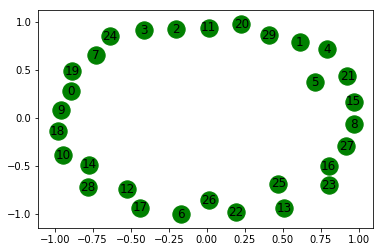

In [6]:
U = nx.empty_graph(30);
pos = nx.spring_layout(U);
nx.draw_networkx(U, pos, node_color='green');

[4 6 8 ... 2 6 6]


/home/alberto/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


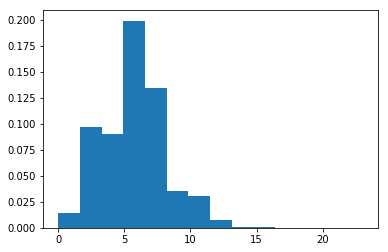

In [15]:
x = numpy.random.poisson(5.69, 20000000)
print(x)
count, bins, ignored = plt.hist(x, 14, normed=True)
plt.show()

[0.13571633 0.07381465 0.07234223 ... 0.14328325 0.06204736 0.07586213]


/home/alberto/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


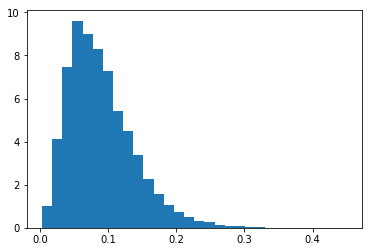

In [39]:
x = numpy.random.gamma(3.456,0.026,20000)
print(x)
count, bins, ignored = plt.hist(x, 30, normed=True)
plt.show()

[8.0, 4.0, 4.0, 6.0, 6.0, 5.0, 4.0, 7.0, 7.0, 5.0, 8.0, 6.0, 9.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 7.0]


/home/alberto/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


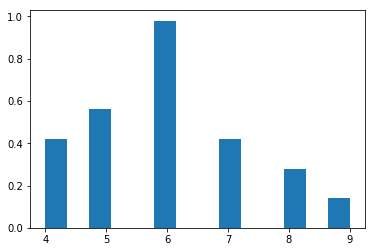

In [23]:
x = numpy.random.normal(5.9,2,20)
y = []
n=0
for i in x:
    i = round(i)
    y.append(i)
    n = n+1
    
print(y)
count, bins, ignored = plt.hist(y, 14, normed=True)
plt.show()

[4, 3, 7, 4, 3, 6, 6, 4, 5, 5, 5, 3, 3, 4, 4, 3, 7, 4, 6, 4, 4, 4, 3, 5, 4]


/home/alberto/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


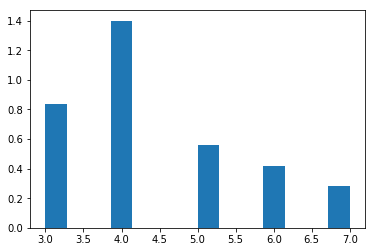

In [24]:
x= [4,
3,
7,
4,
3,
6,
6,
4,
5,
5,
5,
3,
3,
4,
4,
3,
7,
4,
6,
4,
4,
4,
3,
5,
4]
print(x)
count, bins, ignored = plt.hist(x, 14, normed=True)
plt.show()


In [9]:
from soil import history

In [10]:
list(h.to_tuples())

NameError: name 'h' is not defined